## Oblig 2 - Predict stock market price for TESLA

**DISCLAIMER: As of October 27th, we realized there may have been a misinterpretation regarding the task. We were initially under the impression that the goal was to classifying outcomes as 'UP' or 'DOWN' rather than specific numerical values. Nevertheless, we have opted to maintain our approach, as the objective of this assignment is to showcase our understanding within machine learning. Our guidance was derived from the PowerPoint presentation titled "MachineLearning-p2.pptx," which specified the task as "Stock market price prediction (classification: high or low)."**

Explore and research which algorithm would work best for this use case (regression or classification)
Document your findings in a file on why you chose this algorithm.

We opted for classification as it is the preferred method for handling binary classification problems, such as 'yes/no', 'pass/fail','win/lose', etc. 

In our specific case of predicting TESLA's stock market price, our binary classification problem involves determining whether the price will go 'up' or 'down.' Classification is the reliable choice for this type of task. 

In the classification domain, our choice is binary logistic regression. We selected it because it is well-suited for predicting the likelihood of a particular event occurring such as;
- Predict whether rain will occur or not 
- Spam detection 
- Diabetes prediction 
- Cancer detection etc.

Sources used for this oblig: 
- Datarmat (September 26, 2019) *How to Perform Logistic Regression in Python(Step by Step)* https://www.datarmatics.com/data-science/how-to-perform-logistic-regression-in-pythonstep-by-step/ (Downloaded 25.10.23)

## STEP 1: Import libraries and file

In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('TSLA.csv')

In [18]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
1,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
2,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
3,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
4,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400
...,...,...,...,...,...,...,...
247,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
248,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700
249,2023-10-20,217.009995,218.860001,210.419998,211.990005,211.990005,137734000
250,2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400


## STEP 2: Visualization

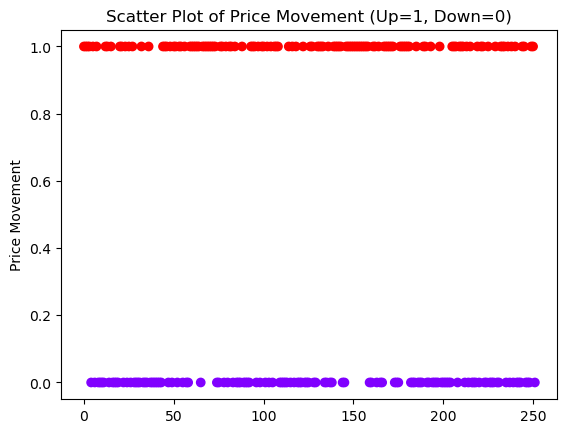

In [19]:
# Calculate the target variable
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Create a scatter plot
plt.scatter(range(len(df)), df['Price_Up'], c=df['Price_Up'], cmap='rainbow')
plt.title('Scatter Plot of Price Movement (Up=1, Down=0)')
plt.ylabel('Price Movement')
plt.show()

In [20]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Up
0,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800,1
1,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900,1
2,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500,1
3,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800,1
4,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400,0
...,...,...,...,...,...,...,...,...
247,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800,0
248,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700,0
249,2023-10-20,217.009995,218.860001,210.419998,211.990005,211.990005,137734000,1
250,2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400,1


## STEP 3: Split data

In [24]:
# Define your features and target variable
X = df[['Open', 'Close']]
Y = df['Price_Up']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## STEP 4: Prediction model

In [25]:
# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

## STEP 5: Results

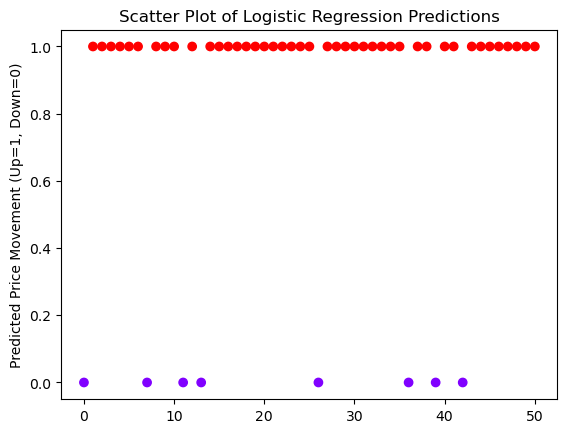

In [26]:
# Create a scatter plot with predicted results
plt.scatter(range(len(X_test)), y_pred, c=y_pred, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression Predictions')
plt.ylabel('Predicted Price Movement (Up=1, Down=0)')
plt.show()

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5098039215686274


## STEP 6: Analyzing the results

An accuracy of around 51.00% indicates that our model successfully predicted whether the stock market price would rise or fall in nearly 51.00% of the instances.